### Image Classification with MNIST data set

In this project, we try to classify the digits in MNIST data set with multilayer perceptron model which means neural network and its training algorithm. 

Let's code with Python. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

So, we shall import MNIST data set with keras library. 

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


`x_train` is train part and `x_test` is test part of independent variables in data sets. `y_train` is train_part and `y_test` is test part of dependent variable(target variable) in data sets. In this data set, independent variables are `pixel values` of images. The target variable is `label` for every digits. 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_train[15]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

We can see label representation with a vector using one-hot encoded.

In [6]:
def one_number(labels, number):
    return (labels == number)*1

#actual = []

lr = np.arange(10)
for no in range(0,10):
    #actual.append(one_number(y_train[], no))
    one_hot = (lr==no).astype(np.int)
    print("label: ", no, "vector representation: ", one_hot)
    

label:  0 vector representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1 vector representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2 vector representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3 vector representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4 vector representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5 vector representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6 vector representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7 vector representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8 vector representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9 vector representation:  [0 0 0 0 0 0 0 0 0 1]


Text(0.5, 1.0, 'Ground Truth : 9')

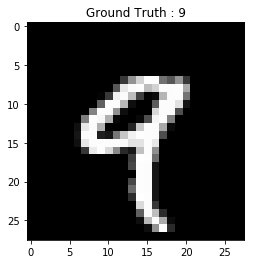

In [7]:
# Display the first image in training data

plt.subplot()
plt.imshow(x_train[4,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[4]))

In the grayscale image matrix, 255 represents `black` and 0 represents `white`.  

Now, let's convert the image matrix to array vector. 

In [8]:
train_labels = y_train
test_labels = y_test

In [9]:
train_images = x_train
test_images = x_test

In [10]:
train_images = train_images.reshape(train_images.shape[0], 784)
test_images = test_images.reshape(test_images.shape[0], 784)

Now, let divide to 255 all pixel values for normalization.  

In [11]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255
test_images = test_images / 255

In [12]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
train_images.shape

(60000, 784)

In [14]:
test_images.shape

(10000, 784)

In [15]:
from keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [16]:
#dimData = np.prod(x_train.shape[1:])

In [18]:
#dimData

### Keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Firstly, we create a `model` object as a model using class Sequential from Keras library/ 

In [2]:
model = Sequential()

Then, we add layers in neural network structure. 

In [3]:
#1. hidden layer
model.add(Dense(512, activation='relu', input_shape=(784,)))

#2. hidden layer
model.add(Dense(512, activation='relu'))

#output layer
model.add(Dense(10, activation='softmax'))

![ANN](neural_networks.png)

We need to optimize the model.

In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Optimizers are a crucial part of the neural network. `compile` is a object which is created for optimizing. Also, it has `loss` parameter. This parameter determines that is used which loss function in the training of the network. 

Since we have categoric target variables, we determined `loss` as `categorical_crossentropy`.

In compile object, `rmsprop` is a optimization algorithm like `gradient descent algorithm` but it has different algorithm from `gradient descent`. 

Now, the model is ready for training. To do this, we will use `fit` function in Keras library. Then we will indicate number of epochs as 25. This means that all data set will be train in the network at 15 times. 

In [20]:
training = model.fit(train_images, train_labels_one_hot, batch_size=256, epochs=25, verbose=1, 
                     validation_data=(test_images, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 184us/step - loss: 0.2739 - acc: 0.9153 - val_loss: 0.1310 - val_acc: 0.9590
Epoch 2/25
60000/60000 [==============================] - 10s 171us/step - loss: 0.0940 - acc: 0.9705 - val_loss: 0.1004 - val_acc: 0.9693
Epoch 3/25
60000/60000 [==============================] - 9s 149us/step - loss: 0.0595 - acc: 0.9809 - val_loss: 0.0885 - val_acc: 0.9754
Epoch 4/25
60000/60000 [==============================] - 8s 138us/step - loss: 0.0413 - acc: 0.9869 - val_loss: 0.0744 - val_acc: 0.9770
Epoch 5/25
60000/60000 [==============================] - 8s 135us/step - loss: 0.0297 - acc: 0.9904 - val_loss: 0.0879 - val_acc: 0.9749
Epoch 6/25
60000/60000 [==============================] - 7s 118us/step - loss: 0.0232 - acc: 0.9928 - val_loss: 0.0780 - val_acc: 0.9781
Epoch 7/25
60000/60000 [==============================] - 7s 122us/step - loss: 0.0177 - acc: 0.9945 - val_loss: 0.1026 

Let see that situations of train accuracy, train_loss, validation_loss, and validation_accuracy during training through plotting.

Text(0.5, 1.0, 'Accuracy Curves')

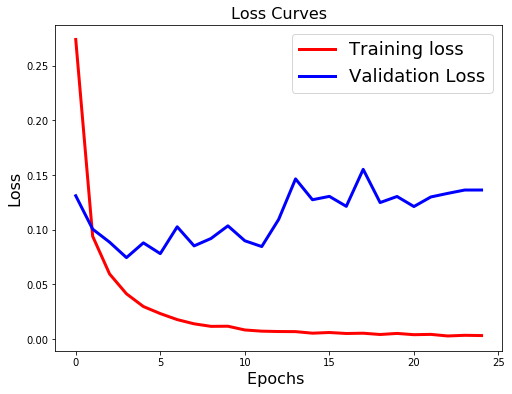

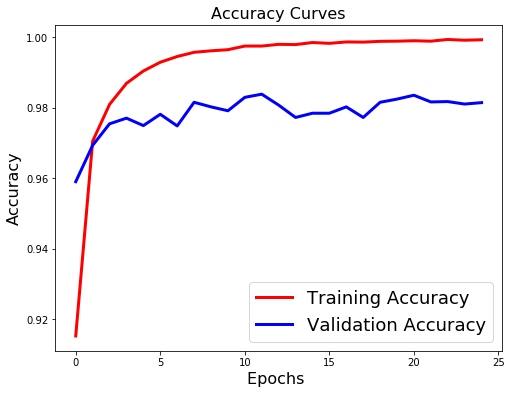

In [21]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(training.history['loss'],'r',linewidth=3.0)
plt.plot(training.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(training.history['acc'],'r',linewidth=3.0)
plt.plot(training.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

As we can see, the network train the data very well but it is not guranteed to work on unseen data. Hence, there is difference between train and test accuracy.   

### Regularization

To avoid this, we will apply regularization. In the neural network, we can add `dropout` layer to solve this problem. In case o dropout, a partition of neurons is turned off during the training. 

In [24]:
from keras.layers import Dropout
 
regular_model = Sequential()
regular_model.add(Dense(512, activation='relu', input_shape=(784,)))
regular_model.add(Dropout(0.5))
regular_model.add(Dense(512, activation='relu'))
regular_model.add(Dropout(0.5))
regular_model.add(Dense(10, activation='softmax'))

Compile the regularized model

In [25]:
regular_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Finally, let we train the regularized model

In [26]:
regular_training = regular_model.fit(train_images, train_labels_one_hot, batch_size=256, epochs=25, verbose=1, 
                     validation_data=(test_images, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 136us/step - loss: 0.3758 - acc: 0.8834 - val_loss: 0.1511 - val_acc: 0.9517
Epoch 2/25
60000/60000 [==============================] - 7s 124us/step - loss: 0.1714 - acc: 0.9484 - val_loss: 0.0984 - val_acc: 0.9687
Epoch 3/25
60000/60000 [==============================] - 8s 130us/step - loss: 0.1299 - acc: 0.9608 - val_loss: 0.0905 - val_acc: 0.9719
Epoch 4/25
60000/60000 [==============================] - 8s 141us/step - loss: 0.1097 - acc: 0.9665 - val_loss: 0.0811 - val_acc: 0.9755
Epoch 5/25
60000/60000 [==============================] - 8s 136us/step - loss: 0.0964 - acc: 0.9708 - val_loss: 0.0836 - val_acc: 0.9777
Epoch 6/25
60000/60000 [==============================] - 8s 125us/step - loss: 0.0885 - acc: 0.9735 - val_loss: 0.0747 - val_acc: 0.9807
Epoch 7/25
60000/60000 [==============================] - 8s 135us/step - loss: 0.0836 - acc: 0.9757 - val_loss: 0.0747 - 

### Plotting 

Text(0.5, 1.0, 'Accuracy Curves')

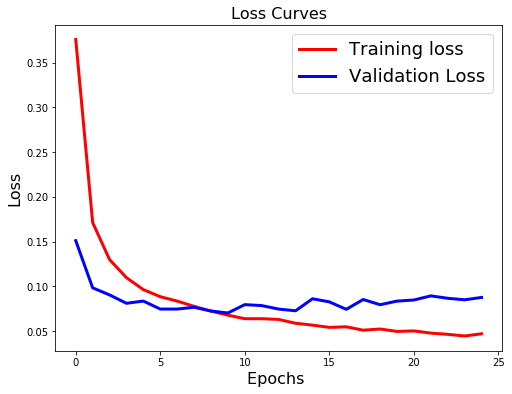

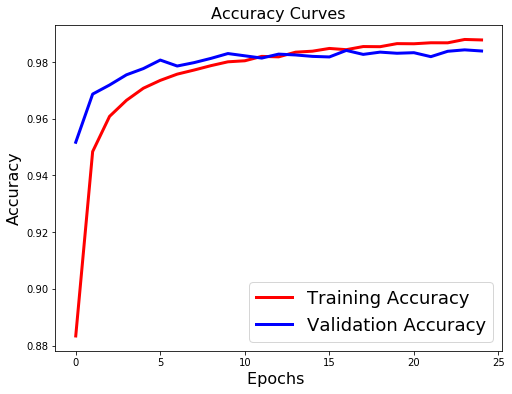

In [27]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(regular_training.history['loss'],'r',linewidth=3.0)
plt.plot(regular_training.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(regular_training.history['acc'],'r',linewidth=3.0)
plt.plot(regular_training.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

We can see that training accuracy and validation accuracy are closer to each other at now. However, after 8 or 9 epochs training accuracy doesn't change too much. Also, validation accuracy is that. So, we can make the process of training with 10 epochs. Since accuracy is approximate to 0.98 after 10 epochs, the process of other epochs is unnecessary. 

Validation accuracy is 0.9839 and validation loss is 0.087. Now, let's plot these results in the epochs. 

Now, let try train the network with different number of hidden layers. 

As before, we had trained the network with one layer. Now, we shall add layers. 

Then, we will change dropout rates. 

Also, let we view affects of different activation function on training of the network.

In [36]:
from keras.layers import Dropout
 
#set a model    
regular_model2 = Sequential()

#1. hidden layer
regular_model2.add(Dense(512, activation='relu', input_shape=(784,)))
regular_model2.add(Dropout(0.6))

#2. hidden layer
regular_model2.add(Dense(512, activation='tanh'))
regular_model2.add(Dropout(0.6))

#3. hidden layer
regular_model2.add(Dense(512, activation='sigmoid'))
regular_model2.add(Dropout(0.6))

#4. hidden layer
regular_model2.add(Dense(512, activation='sigmoid'))
regular_model2.add(Dropout(0.5))

#output layer
regular_model2.add(Dense(10, activation='softmax'))

In [37]:
regular_model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
regular_training2 = regular_model2.fit(train_images, train_labels_one_hot, batch_size=256, epochs=15, verbose=1, 
                     validation_data=(test_images, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 17s 276us/step - loss: 0.6774 - acc: 0.7816 - val_loss: 0.2313 - val_acc: 0.9288
Epoch 2/15
60000/60000 [==============================] - 15s 245us/step - loss: 0.2502 - acc: 0.9286 - val_loss: 0.1632 - val_acc: 0.9526
Epoch 3/15
60000/60000 [==============================] - 15s 258us/step - loss: 0.1952 - acc: 0.9433 - val_loss: 0.1259 - val_acc: 0.9657
Epoch 4/15
60000/60000 [==============================] - 15s 242us/step - loss: 0.1699 - acc: 0.9526 - val_loss: 0.1147 - val_acc: 0.9675
Epoch 5/15
60000/60000 [==============================] - 15s 254us/step - loss: 0.1520 - acc: 0.9578 - val_loss: 0.1011 - val_acc: 0.9726
Epoch 6/15
60000/60000 [==============================] - 15s 251us/step - loss: 0.1346 - acc: 0.9615 - val_loss: 0.0986 - val_acc: 0.9734
Epoch 7/15
60000/60000 [==============================] - 17s 289us/step - loss: 0.1251 - acc: 0.9655 - val_loss: 0.

Text(0.5, 1.0, 'Accuracy Curves')

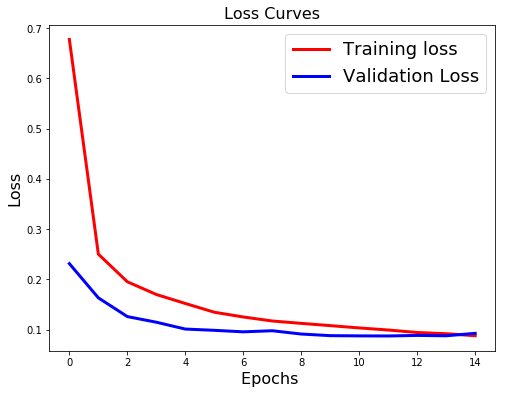

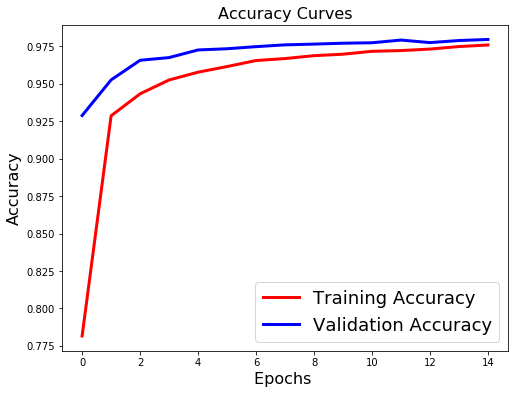

In [39]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(regular_training2.history['loss'],'r',linewidth=3.0)
plt.plot(regular_training2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(regular_training2.history['acc'],'r',linewidth=3.0)
plt.plot(regular_training2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### References 

https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/

